# COGS 118B - Final Project

# Insert title here

## Group members
- Anna Sim
- Jing Yin (Trevor) Yip
- Kevin Fisher
- Ashesh Kaji

# Abstract 

This project aimed at enhancing the interpretability of relationships within word embeddings generated by the Word2Vec embeddings. The research revealed that relationship vectors (vector differences between analogical pairs of words from various categories) cluster well when dimensionally reduced using PCA and KMeans. Moreover, the angular relationships in lower dimensions provided insight into the relationships between different categories of relationship vectors, such as country-capital and name-nationality being neighbors. The solution's performance was evaluated using the Adjusted Rand Index , which used the labels of categories as a reference point. We were able to get a ~0.419 ARI score, which is a good score given that it included many clustering labels which overlap due to semantic similarity, an interesting fact we attempted to study further during the project. In summary, this research provided valuable insights into the interpretability of relationships within word embeddings, demonstrating that clustering relationship vectors can effectively reveal meaningful connections and relationships between words in embedding models.


# Background

In recent years, there has been a drastic increase in the implementation of large language models (LLM). LLMs accelerated the development of tools like recommendation systems, language sentiment analysis, and machine translation. The increased use of the language models requires further analysis and interpretation work to ensure responsible use of the architectures and models. High-risk environments require not only high accuracy of the predictions but also an understanding of why the model makes certain predictions<a name="molnar"></a>[<sup>[4]</sup>](#molnarnote). As users rely more and more on machine learning systems to make decisions, there is an increasing risk of misuse and misinterpretation of the results and capabilities of the system. Therefore, there is a demand for interpretability research both in academia and industry.

Interpretability of results of language models depends on understanding the relationships between semantic and syntactic content of words and their vector representations. Word2Vec is a popular algorithm developed by Tomas Mikolov et al. in 2013, which revolutionized the world of language models by proposing a new method of creating such continuous vector representations of words<a name="mikolov1"></a>[<sup>[2]</sup>](#mikolov1note). Preliminary analysis of Word2Vec embeddings showed that the vector representation captures relationships between the words. In the original paper, the authors showed how similar words are not only represented with vectors that have high cosine similarity, but also exhibit complex relationships like vector(“smallest”) = vector(”biggest”) - vector(”big”) + vector(”small”). They also show intricate semantic relationships, like country/city relationships and syntactic relationships from adjectives to adverbs<a name="mikolov1"></a>[<sup>[2]</sup>](#mikolov1note).

In the follow-up paper, “Distributed Representations of Words and Phrases and their Compositionality,” Mikolov introduces an extension to the model, focusing on the word phrases and adding distributed representations of words and phrases, which allowed for even more robust vector representations and semantic relationships like idiomatic phrases<a name="mikolov2"></a>[<sup>[3]</sup>](#mikolov2note). The paper showed connections from cities to their respective newspaper outlets and countries to their airlines<a name="mikolov2"></a>[<sup>[3]</sup>](#mikolov2note).

However, the research of Tal Linzen showed that there are potential limitations in relying on the cosine similarity for analogical reasoning to emerge, and the analogous relationships presented in the original papers break down when you reverse them<a name="linzen"></a>[<sup>[1]</sup>](#linzennote). The analogical reasoning can be partially explained by the model picking up the closest neighbor word and not the relative difference in similarity in the analogous pair<a name="linzen"></a>[<sup>[1]</sup>](#linzennote). Therefore, there is a need for further research looking into the relative neighborhoods and analogical reasoning capabilities of Word2Vec models. 

Moreover, during the further investigation of analogical reasoning Gladkova et al., obtained the Biggest Analogical Test Set which allows for a balance analysis of the word2vec embeddings<a name="gladkova"></a>[<sup>[5]</sup>](#gladkovanote). In our report we utilize this dataset for the further analysis of relationship pairs.

We will present an extensive analysis of the clustering of differences between analogical pairs of Word2Vec embeddings, in order to examine the semantic and vector representation relationship of the words, gain insight into what drives the apparent vector-based analogical reasoning, and expand the potential areas of research on the interpretability of language models.


# Problem Statement

It is well known that embeddings generated by Word2Vec models respect relationships between words. For example, the differences between the vectors for countries and their respective capitals are very similar between all such pairs. In this sense, we get “relationship vectors”, which capture an entire relationship with one vector, and allow for reasoning by analogy. However, most observations of this have been hand-picked, and have considered only a couple of possible relationships. As such, we would like to tackle the issue of investigating all possible “relationship vectors”, so that we are not leaving out potentially overlooked members of these relationships or overlooked relationships entirely.

# Data

The dataset we used to obtain word pairs for analogies was the BATS 3.0 <a name="bats"></a>[<sup>[5]</sup>](#batsnote). The BATS 3.0 dataset is a collection word pairs belonging to 4 major categories wherein each category as 10 sub-categories and 50 word pairs in each sub-category. These were accumulated using questionnaires and over 99,000 total questions. The dataset and its details, including the paper on it can be found at the following link:

[https://aclweb.org/aclwiki/Bigger_analogy_test_set_(State_of_the_art)](https://aclweb.org/aclwiki/Bigger_analogy_test_set_(State_of_the_art))

We will be using a set of [Word2Vec embeddings](https://code.google.com/archive/p/word2vec/), namely the [Google News negative sampling dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing) that was trained in the original paper. This is the dataset in which analogical vector behavior was first identified, so it is the perfect candidate. Raw, each observation in this dataset is the 300-dimensional vector embedding of a word in the vocabulary, listed in frequency order. Each individual dimension doesn’t represent anything in particular, but together they can capture the relationships between large vocabularies of words. This particular dataset has a vocabulary of 3,000,000 words and phrases (observations), but since we are going to be looking at every pair of words, we will be restricting our data to the most frequent 10,000 points (roughly).

Total observations: 2000 word pairs
Format: Tab separated text file

Data-cleaning: The data was in a clean format, but some pairs had multiple options for the latter word, so we chose the first option. Additionally, we removed any words that were not present in the google news word2vec model.


# Proposed Solution

Our proposed solution to increase the interpretability of embedding relationships is to perform dimensionality reduction, visualization, and clustering on the relationships between pairs of words within the dataset. This solution was chosen due to the fact that it is difficult to examine a large number of relationships manually, and clustering will allow for distinct groups of similar relationships to emerge.

We can examine the resultant similar and dissimilar categories by performing visualization and clustering on relationship vectors after doing dimensionality reduction using PCA, gaining insight into the semantic interpretation of words in the vector space. A relationship between two words will be calculated mathematically by taking the difference between their corresponding vectors. The directionality of each word pair category will be visualized, and all word pairs will be clustered using KMeans.

By inspecting the relationships in the data visualization and the optimal clustering, we hope to glean additional knowledge about how words are represented and their semantic meanings within the embedding vector space.


# Evaluation Metrics

An evaluation metric that can be used to quantify the performance of our solution is the adjusted rand index. The rand index is a metric that computes similarity between two clusterings by comparing all pairs of samples and their assignment to clusters in the predicted and true clusterings. In our case, the predicted clusters will be generated using KMeans and the true clusterings will be the original categories of word pairs in the dataset. The adjusted rand score is the rand index adjusted for chance, and it has a range of (-0.5, 1.0), where 0 represents random clustering and 1 represents identical clustering.

The rand score is calculated by $\text{\# of agreeing pairs}/\text{\# of total pairs}$, and the adjusted rand score is calculated by $(RI - Expected RI)/(\max(RI) - Expected RI)$.

The adjusted rand score gives a good measure of cluster validity, but we will also be inspecting the clusters and checking whether pairs that we already know have some kind of relationship (e.g. capital/country, man/woman, etc.) are getting put into reasonable clusters.

# Results

We begin with some setup that will be relevant to all sections of our results:

In [1]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation
import numpy as np
import pandas as pd

# Loading Data
import os
import gensim.downloader as api
from gensim.models import KeyedVectors

# Trie for fast lookup
from datrie import BaseTrie
import string

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
# Import Google News 300 Word2Vec dataset
w2v_model: KeyedVectors = api.load('word2vec-google-news-300')

# Define a helper function to get the vector of a given word
def vec(str):
    return w2v_model.vectors[w2v_model.key_to_index[str]]

# Make a Trie for O(1) lookup of containment of words
t = BaseTrie(string.ascii_lowercase)

for x in w2v_model.index_to_key:
    t[x] = True

In [3]:
LEN_DATA = 50

# Load each file in the dataset
list_dirnames = []
list_data = []
for subdir, dirs, files in os.walk('./BATS_3.0'):
    for file in files:
        if file.endswith('.txt'):
            list_dirnames.append(file)
            list_data.append(pd.read_csv(os.path.join(subdir, file), sep='\t', header=None))

# Add pair_id, which uniquely identifies each pair, and relation_id, which identifies the dataset
full_df = pd.concat([ df.assign(pair_id=range(LEN_DATA*i, LEN_DATA*(i+1)), relation_id=i) for i, df in enumerate(list_data) ])

# Remove all but the first result for the second element of each pair
full_df[1] = full_df[1].str.split('/', expand=True)[0]

# Remove all pairs where one of the words are not in the word2vec dataset
full_df = full_df[full_df[0].apply(t.__contains__) & full_df[1].apply(t.__contains__)]

In [4]:
# Subtract the second word in the pair from the first
word_pair_vecs = np.vstack(full_df[0].apply(vec)) - np.vstack(full_df[1].apply(vec))

In [5]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('dim_reduce', PCA(n_components=64, random_state=42))
])

### Subsection 1 - Initial PCA with valid and invalid analogical relationship pairs

Initially, we intended to see what word pairs clustered with real analogical pairs, to see if those pairs that don't fit the relation conventionally function similarly. There are three relationships that we investigated at the start; country/capital, male/female, and membership relationships. The following code filters the dataset just for these three.

In [6]:
names = pd.Series(list_dirnames).str.extract(r'\[(.*)\]')[0]
name_to_id = pd.Series(names.index.values, index=names)
relation_ids = name_to_id[['country - capital', 'male - female', 'meronyms - member']]
filter_cond = full_df['relation_id'].isin(relation_ids)
filter_df = full_df[filter_cond]

To generate the pairs, we take every word in the dataset, and pair it with another word, with no duplicates (up to swapping order). We then difference those to get the relation vector. Plotting these under PCA demonstrated patterns, but because there are so many invalid pairs generated by this, as compared to the valid pairs (colored in the left graph, around 0.5% of the data), we found that clustering did not pick up on these patterns, even though they were visually separable.

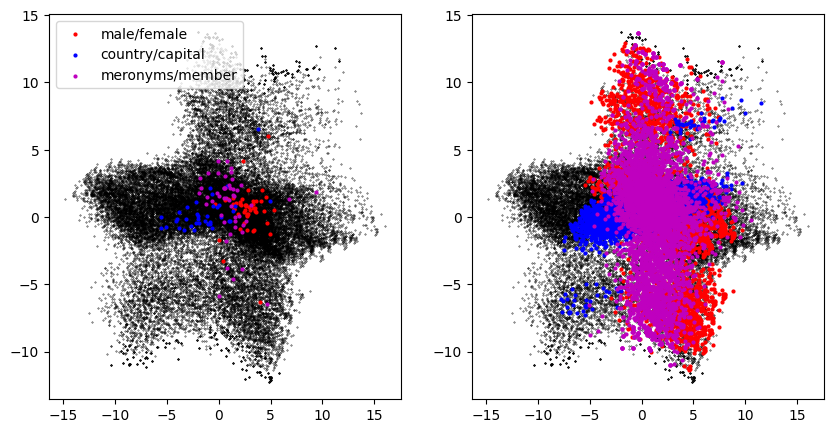

In [16]:
filter_flat_df = filter_df.melt(id_vars=['pair_id', 'relation_id'], value_vars=[0, 1], value_name='word').drop(columns='variable')
generated_word_vecs = np.vstack(filter_flat_df['word'].apply(vec))
i, j = np.triu_indices(generated_word_vecs.shape[0], 1)
differences = generated_word_vecs[i] - generated_word_vecs[j]
transform_with_invalid = pipe.fit_transform(differences)
valid_pairs = filter_flat_df.loc[i, 'pair_id'].reset_index(drop=True) == filter_flat_df.loc[j, 'pair_id'].reset_index(drop=True)
relationship_conds = [ (filter_flat_df.loc[i, 'relation_id'] == id).reset_index(drop=True) & (filter_flat_df.loc[j, 'relation_id'] == id).reset_index(drop=True) for id in relation_ids ]
cc_pairs = transform_with_invalid[relationship_conds[0]]
mf_pairs = transform_with_invalid[relationship_conds[1]]
mm_pairs = transform_with_invalid[relationship_conds[2]]
cc_valid_pairs = transform_with_invalid[valid_pairs & relationship_conds[0]]
mf_valid_pairs = transform_with_invalid[valid_pairs & relationship_conds[1]]
mm_valid_pairs = transform_with_invalid[valid_pairs & relationship_conds[2]]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(*transform_with_invalid[:, :2].T, c='k', s=0.1)
axs[0].scatter(mf_valid_pairs[:, 0], mf_valid_pairs[:, 1], c='r', s=4, label='male/female')
axs[0].scatter(cc_valid_pairs[:, 0], cc_valid_pairs[:, 1], c='b', s=4, label='country/capital')
axs[0].scatter(mm_valid_pairs[:, 0], mm_valid_pairs[:, 1], c='m', s=4, label='meronyms/member')

axs[0].legend()

axs[1].scatter(*transform_with_invalid[:, :2].T, c='k', s=0.1)
axs[1].scatter(mf_pairs[:, 0], mf_pairs[:, 1], c='r', s=4, label='male/female')
axs[1].scatter(cc_pairs[:, 0], cc_pairs[:, 1], c='b', s=4, label='country/capital')
axs[1].scatter(mm_pairs[:, 0], mm_pairs[:, 1], c='m', s=4, label='meronyms/member');

### Subsection 2 - PCA on 3 valid analogical pair categories 

From here, we decided to simplify, and look at just the "valid", original pairs. Here, we noticed something; when PCA was applied, not only did we see 3 clear clusters, but they were also radially distributed around the center. This reflects how direction is more important in Word2Vec, and it is somewhat preserved since PCA is a linear transformation. This is also a reason we didn't pursue UMAP or tSNE much other than preliminary tests, since those cannot preserve these relations in the same way.

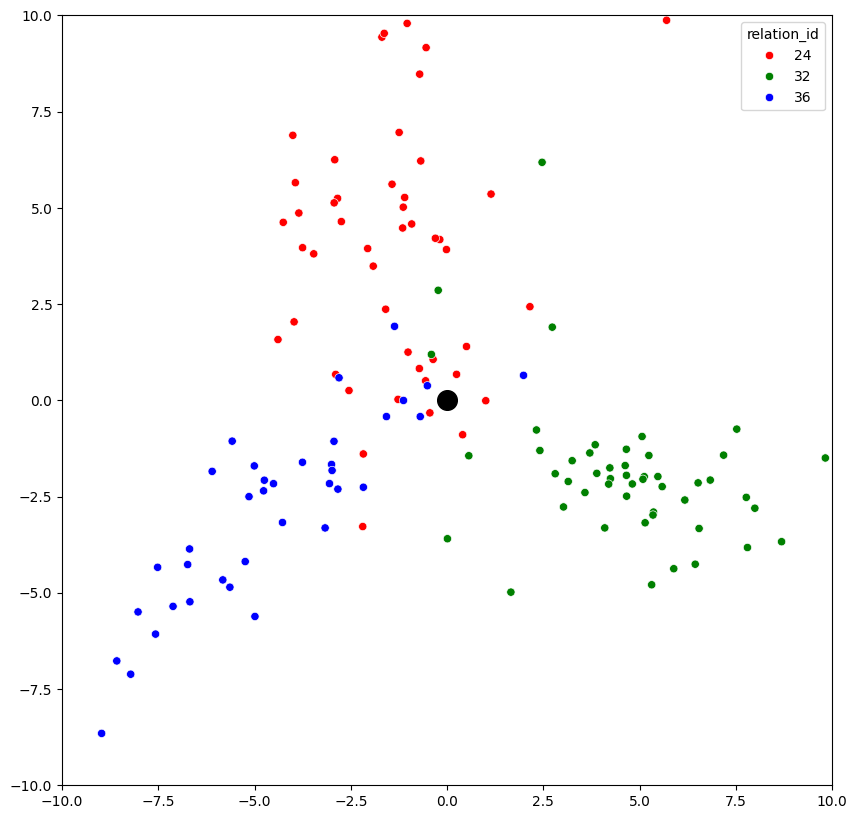

In [8]:
# Calculate differences between all actual pairs from the dataset
word_pair_vecs = np.vstack(full_df[0].apply(vec)) - np.vstack(full_df[1].apply(vec))
transform_filter = pipe.fit_transform(word_pair_vecs[filter_cond])

fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim((-10, 10))
plt.ylim((-10, 10))
ax.set_aspect('equal')

sns.scatterplot(x=transform_filter[:, 0], y=transform_filter[:, 1], hue=filter_df['relation_id'], palette=['r', 'g', 'b'])
plt.scatter(0, 0, c='k', s=200);

Indeed, running a clustering algorithm on this transform, we see that the clusters are very close to the original values.

In [9]:
clusters = KMeans(n_clusters=3).fit(transform_filter[:, :2])
adjusted_rand_score(filter_df['relation_id'], clusters.labels_)

0.6912842189834875

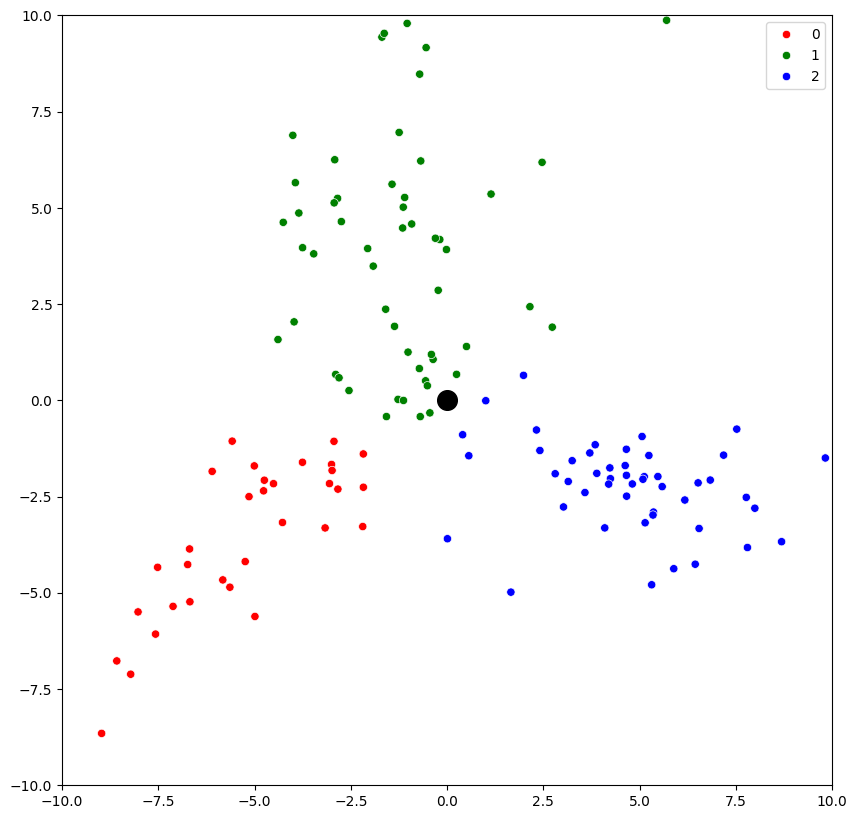

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim((-10, 10))
plt.ylim((-10, 10))
ax.set_aspect('equal')
sns.scatterplot(x=transform_filter[:, 0], y=transform_filter[:, 1], hue=clusters.labels_, palette=['r', 'g', 'b'])
plt.scatter(0, 0, c='k', s=200);

### Subsection 3 - PCA on 40 analogical categories from BATS dataset

This success inspired us to do this on the full BATS dataset. It is slightly harder to see the radial behavior here, since PCA can only fit so much data into two dimensions, but we can still see that in general, the relations stay in a slice of the graph around the origin.

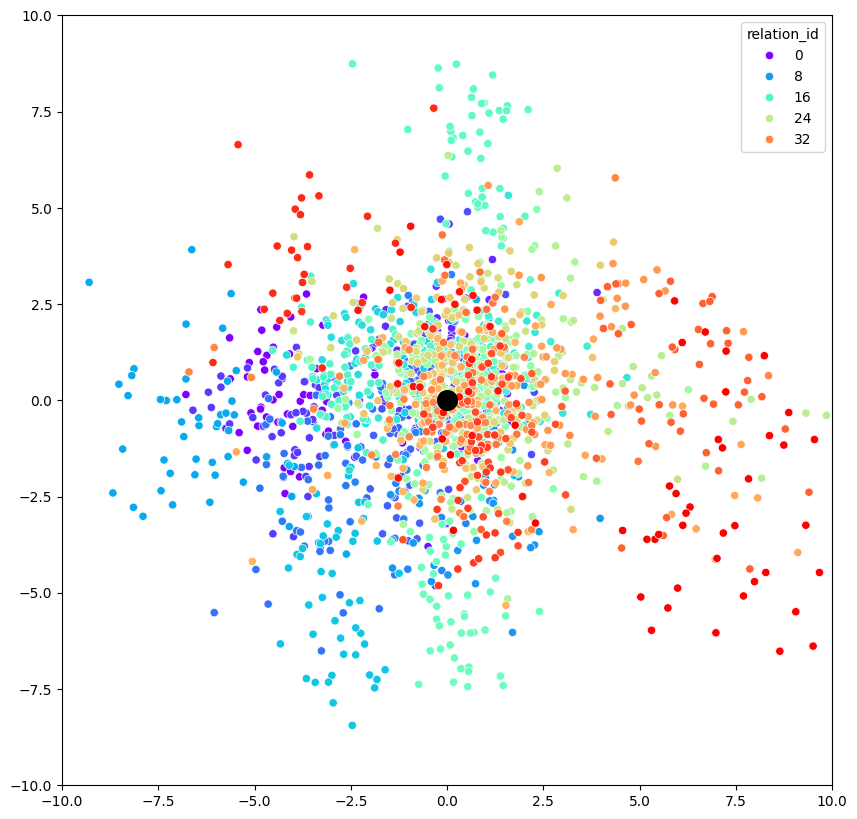

In [11]:
transform = pipe.fit_transform(word_pair_vecs)

fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim((-10, 10))
plt.ylim((-10, 10))
ax.set_aspect('equal')

sns.scatterplot(x=transform[:, 0], y=transform[:, 1], hue=full_df['relation_id'], palette=plt.cm.rainbow)
plt.scatter(0, 0, c='k', s=200);

### Subsection 4 - Clustering of PCA vectors for all valid pairs

Moreover, we found that even with all 40 clusters, we are still able to cluster very successfully with k-means, achieving an adjusted rand score of 0.419. Applying PCA helps this clustering, as the results from before might suggest; by running a grid search, we found the optimal parameters were 64 dimensions of PCA, 40 clusters, and 50 randomized runs of k-means. Increasing the number of clusters does improve performance, as it will in any clustering application, but we limited it to 40 in order to prevent too many real clusters from getting split into multiple clusters. The full grid search can be seen in `BATS40_grid_search.ipynb`.

In [12]:
labels = KMeans(n_clusters=40, n_init=50, random_state=42).fit_predict(transform)

adjusted_rand_score(full_df['relation_id'], labels)

0.4194475315576613

As we discuss later, we were able to pick the cluster that best recalled each relation, and using that, we could see which relations clustered together, indicating they are a very similar kind of relation.

### Subsection 5 - Directionality of valid pair vectors under PCA

We also wanted to take a look at the radial behavior in the 2-dimensional PCA, so we took the average of each relation to get its average angle, then normalized it to remove the effect of magnitude. This results in a circular diagram of all the relations.

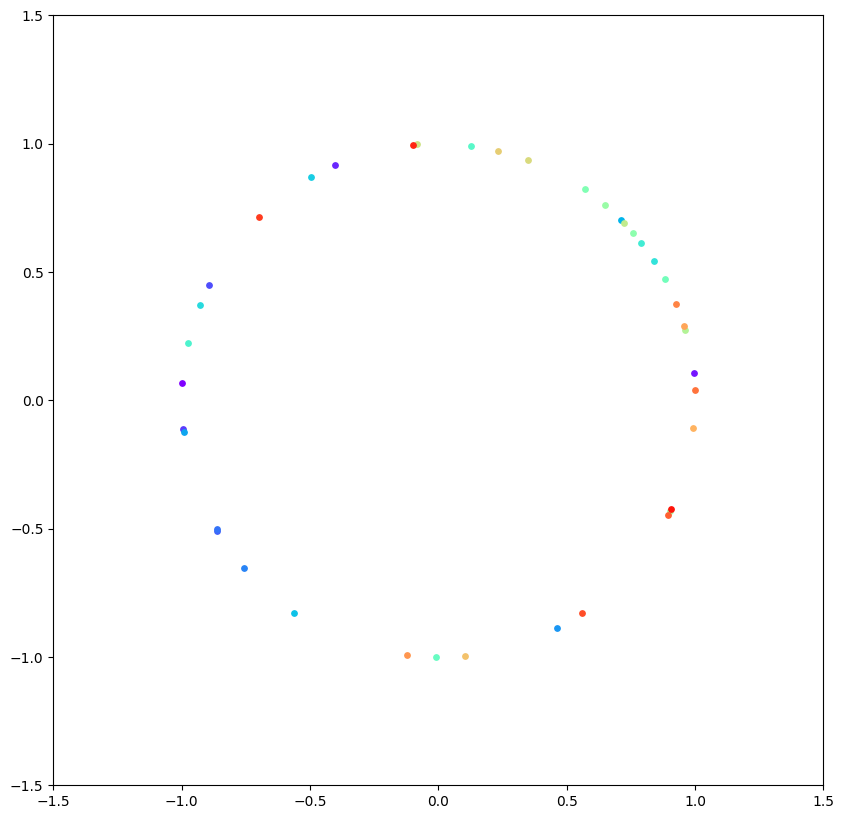

In [18]:
relations = full_df['relation_id'].unique()

fig, ax = plt.subplots(figsize=(10, 10))

# Norm each of the points; this is done because angle matters more than magnitude in Word2Vec
normed_points = transform[:, :2]/np.linalg.norm(transform[:, :2], axis=1).reshape(-1, 1)

angles = []

for r in relations:
    # Take the average of all the angles
    mean = normed_points[full_df['relation_id'] == r].mean(axis=0)
    # Re-normalize
    normal = mean/np.linalg.norm(mean)

    # Calculate angle
    angle = np.arctan2(*normal)
    angles.append(angle)

    # Calculate color based on relation id, then draw
    color = plt.cm.rainbow(r/len(relations))
    plt.scatter(normal[0], normal[1], color=color, s=15)

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
ax.set_aspect('equal');

It would be difficult to label the circle, so we unwrap it into a line for easier visualization:

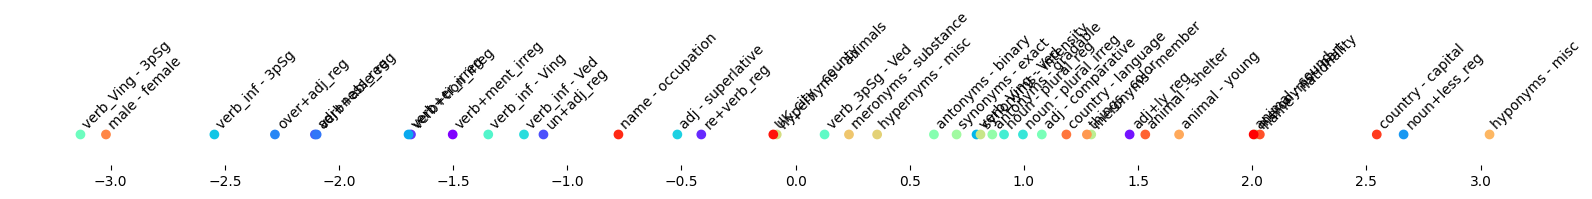

In [19]:
fig, ax = plt.subplots(figsize=(20, 2))

plt.scatter(angles, np.zeros_like(angles), c=np.linspace(0, 1, 40), cmap=plt.cm.rainbow)
plt.yticks([])
plt.ylim((-0.5, 2))
plt.xticks(np.linspace(-3, 3, 13))
plt.box(False)

text = [plt.text(a, 0.1, names[i], rotation=45) for i, a in enumerate(angles)]

This is still difficult to read, since many of the points overlap (signifying how similar those relations are). To resolve this, we distribute the points evenly, in order of their angle, so that we can actually see the names:

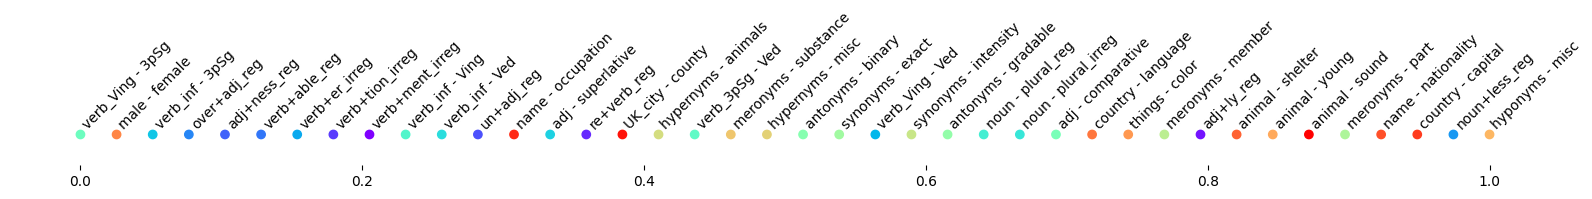

In [20]:
fig, ax = plt.subplots(figsize=(20, 2))

order = np.argsort(angles)
even_points = np.linspace(0, 1, len(order))

plt.scatter(even_points, np.zeros_like(even_points), c=order, cmap=plt.cm.rainbow)
plt.yticks([])
plt.ylim((-0.5, 2))
plt.box(False)

text = [plt.text(x, 0.1, names[i], rotation=45) for i, x in zip(order, even_points)]

# Discussion

To perform the initial analysis of the structure of the embedding space, we used principal component analysis (PCA) on the word pairs. The data consisted of valid analogical pairs from the BATS dataset and invalid analogical pairs that we obtained by mixing the word pairs in between the categories and in the categories. For the exploratory analysis, we picked three categories: male-female, country-capital, and meronyms-member. The initial observation was that the embeddings seemed to be of a radial nature. The ‘petals’ of the data come from the center, and each category has a unique angle. One major obstacle in performing an analysis of the embedding space was the ratio of valid to invalid pairs. The resulting dataset consisted of 158 valid pairs for three categories and ~68000 invalid pairs. Therefore, no clustering algorithm could be used to obtain any meaningful results. Moreover, in Figure 2, by visualizing both the valid and invalid pairs generated by mixing words inside the category, one can see that the variability of word pairs of male-female and meronyms-member categories are mostly driven by PC 2 and the variability of the country-capital pairs are driven by PC 1.

To further investigate the relationship between the three categories, we limited the data only to valid pairs. The PCA of the pair embeddings shows a clear visual separation of clusters and the radial nature of the embeddings. Using k-means clustering algorithms on the PC transformation, we obtained an adjusted rand score of 0.69.

Performing PCA on the 3 categories gave us a sense that the principal components are successful at embedding the differences between relationship vectors well. With that motivation, we decided to plot the results post-fitting the relationship vectors from all 40 $RV$s. This plot reveals a less obvious yet well-patterned distribution of points. We can notice that points belonging to a category are present along one angle more than the others and evidently in some linear orientation. This hints at the fact that the angles at which these appear play a role in their semantic relationship to the other $RV$s. It is also noticeable that there is a greater density of points towards the origin as compared to other regions, with some categories having greater variance between points relative to others.

We then moved on to clustering all 40 categories. By using GridSearchCV, we determined the optimal hyperparameters for both PCA and KMeans. We decided to fix n_clusters at 40, as it makes the most sense due to the fact that we have 40 word pair categories. The optimal number of components to reduce to was 64, and the optimal value of n_init was 50. Altogether, this model resulted in an adjusted score of ~0.419, which is well above random chance.

Looking at individual clusters and their contents, we can also observe that the recall for each cluster is generally quite good, as each cluster mostly contains word pairs from only one category. In particular, the model seems to struggle with categories that contain similar or identical words or types of words.

By representing the average of each category as a normalized point on the edge of a unit circle centred at the origin, we can explore categories that are similar and dissimilar, measured by the difference in their angle. Certain groups of categories almost overlap with one another in terms of angles, such as those that contain verbs, nouns, or animals, which makes sense since they contain the same word and are semantically related.

The flattened version of the circle is obtained by doing a polar coordinate transformation, and gives a clearer picture of specific categories that are closer and further to each other. (Note that the first and last elements are also considered close to each other due to the circular nature of the original points.)

### Limitations

One of the limitations of our project would be related to our dataset and how we used it. The size of our dataset could be expanded even more, in terms of the number of words. Currently, the word relation dataset has 100 words per category and 40 categories, coming up to a total of 4000 words, and we actually used less than that, due to some words not being present in the Google word2vec dataset. Additionally, some words could “pair” to a list of different words in the original dataset, but we only looked at the first available option, and including the other options in our analysis might alter the results. 

### Ethics & Privacy

In general, this is a relatively low-risk project in terms of privacy, since the observations are embeddings of individual words and not data gathered about individuals. The main concern with respect to people is that there are phrases in the vocabulary, and some of those phrases are the names of people. However, looking at the phrases in the 10,000 most frequently used words, we see only extremely famous names, like presidents and other extremely public figures. To those people, the possible impacts are in comparison very small, and even so our main focus will not be on them in our investigations, since they are such a small proportion of the vocabulary.

The other main ethics concern has to do with bias. There are known existing biases in the Word2Vec dataset we are working with; for example, the vector consisting of woman minus man plus doctor moves closer to nurse (although notably the closest vector is still doctor). We also see other biases, such as a noted US-centrism in terms of the most frequent vectors, as well as the vectors closest to concepts such as “country”. This comes from inherent biases in the training dataset (Google News), probably influenced by the combination of Google being a US-based company and the dataset being primarily in the English language. In some sense, investigating these biases and how they affect the analogical reasoning capabilities of Word2Vec is one of the goals of this project, but it is still important to keep them in mind beforehand, so that we do not misinterpret or overgeneralize results that are biased in these ways.


### Conclusion

Within this project, we succeeded in producing interesting results that helped increase the interpretability of words within the vector space. Our results support our hypothesis that words are represented in a semantically meaningful way within the vector embedding space, and this increased interpretability can potentially help with understanding more of what’s going on behind the scenes of language models. One aspect that could be explored in the future could be exploring more novel word pairings within the vector space, which would require generating new high-quality dataset of word pairings that make sense.

# Footnotes
<a name="linzennote"></a>1.[^](#linzen): Linzen, Tal. “Issues in Evaluating Semantic Spaces Using Word Analogies.” arXiv.Org, 24 June 2016, arxiv.org/abs/1606.07736

<a name="mikolov1note"></a>2.[^](#mikolov1): Mikolov, Tomas, et al. “Efficient Estimation of Word Representations in Vector Space.” arXiv.Org, 7 Sept. 2013, arxiv.org/abs/1301.3781

<a name="mikolov2note"></a>3.[^](#mikolov2): Mikolov, Tomas, Ilya Sutskever, et al. “Distributed Representations of Words and Phrases and Their Compositionality.” arXiv.Org, 16 Oct. 2013, arxiv.org/abs/1310.4546

<a name="molnarnote"></a>4.[^](#molnar): Molnar, Christoph. “Interpretable Machine Learning.” 3.1 Importance of Interpretability, 21 Aug. 2023, christophm.github.io/interpretable-ml-book

<a name="gladkovanote"></a>5.[^](#gladkova): Gladkova, Anna, et al. “Analogy-Based Detection of Morphological and Semantic Relations with Word Embeddings: What Works and What Doesn’t.” ACL Anthology, aclanthology.org/N16-2002/. Accessed 20 Mar. 2024. 